# NBA Data Analysis: RAPTOR Metrics And Individual Success

In this project I am analyzing data about the NBA from different sources. The advantage of being both interested in data analysis and basketball is that they mesh with each other quite well. Every basketball game produces a large number of data points, like points, assists, rebounds, steals, blocks or fouls. Advanced metrics are created to gain more insight into productivity and efficiency. One of these advanced metrics is the <a href= "https://fivethirtyeight.com/features/how-our-raptor-metric-works/">Raptor metric</a>. It is a relatively new metric and i want to explore if it accurately describes success on an individual level in comparison to other advanced metrics. I will combine this data set with the <a href= "https://www.kaggle.com/open-source-sports/mens-professional-basketball">Men's professional basketball data set</a> and try to quantify individual success in the NBA.

### Setup

Importing libraries and settings.

In [134]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.options.display.max_columns = None


### First impressions of the data

The Raptor data set has 20,059 rows and 40 columns.

In [135]:
nba = pd.read_csv("nba-data-historical.csv", encoding = "ISO-8859-1")
print(nba.info())
display(nba)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20059 entries, 0 to 20058
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_id    20059 non-null  object 
 1   name_common  20059 non-null  object 
 2   year_id      20059 non-null  int64  
 3   age          20059 non-null  int64  
 4   pos          20059 non-null  object 
 5   team_id      20059 non-null  object 
 6   tmRtg        20059 non-null  float64
 7   franch_id    20059 non-null  object 
 8   G            20059 non-null  int64  
 9   Min          20059 non-null  int64  
 10  MP%          20059 non-null  float64
 11  MPG          20059 non-null  float64
 12  P/36         20054 non-null  float64
 13  TS%          19964 non-null  float64
 14  A/36         20054 non-null  float64
 15  R/36         20054 non-null  float64
 16  SB/36        20054 non-null  float64
 17  TO/36        20054 non-null  float64
 18  Raptor O     20059 non-null  float64
 19  Rapt

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
0,youngtr01,Trae Young,2020,21,PG,ATL,-7.6,ATL,60,2120,65.1,35.3,29.3,59.5,9.2,4.2,1.2,4.8,7.1,-3.5,3.6,7.0,17.0,15.4,34.9,45.6,16.2,1.6,11.5,6.5,1.4,0.3,113.6,36.1,117.2,50.1,36.1,86.0,45.5,44.8
1,huntede01,De'Andre Hunter,2020,22,SF,ATL,-7.6,ATL,63,2018,62.0,32.0,13.5,52.1,1.9,5.0,1.1,1.8,-2.5,-1.3,-3.8,-1.1,5.9,4.7,17.5,8.0,12.1,2.3,13.1,7.6,1.0,0.7,99.5,16.9,117.3,45.4,35.5,76.4,44.5,21.1
2,huertke01,Kevin Huerter,2020,21,SG,ATL,-7.6,ATL,56,1760,54.1,31.4,13.6,53.6,4.2,4.5,1.5,1.7,-0.4,-2.4,-2.8,-0.1,8.0,8.1,17.1,17.5,12.0,2.1,12.0,7.0,1.4,1.3,107.1,17.2,116.5,45.3,38.0,82.8,54.8,10.5
3,reddica01,Cam Reddish,2020,20,SF,ATL,-7.6,ATL,58,1551,47.6,26.7,13.7,50.0,2.0,4.9,2.0,2.2,-2.8,-0.1,-3.0,-0.2,5.9,5.0,18.9,8.0,13.6,2.4,12.7,7.5,1.9,1.5,94.7,18.3,115.0,42.8,33.2,80.2,45.1,22.7
4,collijo01,John Collins,2020,22,PF,ATL,-7.6,ATL,41,1363,41.9,33.2,22.7,65.9,1.5,10.7,2.5,1.9,-0.0,-0.3,-0.3,1.7,15.6,17.1,22.7,7.6,10.1,9.0,24.0,16.4,1.1,4.1,123.7,21.6,112.2,64.2,40.1,80.0,24.3,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20054,weissbo01,Bob Weiss,1977,34,PG,WSB,1.0,WAS,62,768,19.5,12.4,6.8,51.2,5.8,3.1,2.7,2.3,-0.3,1.4,1.1,1.5,8.2,10.5,10.1,20.9,25.5,2.1,7.1,4.6,3.1,0.5,99.5,11.5,97.9,46.6,NaN,78.4,0.0,27.8
20055,riordmi01,Mike Riordan,1977,31,SF,WSB,1.0,WAS,49,289,7.3,5.9,9.3,39.3,2.4,3.2,0.6,2.1,-4.7,-2.5,-7.3,-0.7,1.2,-4.3,16.0,9.0,15.2,2.5,7.0,4.8,0.5,0.4,81.1,15.4,103.3,36.2,NaN,73.3,0.0,16.0
20056,weathni01,Nick Weatherspoon,1977,26,SF,WSB,1.0,WAS,11,152,3.9,13.8,13.2,37.1,0.4,5.4,1.8,2.2,-5.6,-1.8,-7.3,-0.4,0.8,-4.4,22.9,1.8,11.2,7.6,8.6,8.1,0.9,1.7,78.3,21.1,100.9,35.5,NaN,62.5,0.0,10.5
20057,pacejo01,Joe Pace,1977,23,C,WSB,1.0,WAS,30,119,3.0,4.0,18.3,47.2,1.1,9.7,5.4,4.6,-4.1,1.5,-2.7,0.0,4.0,3.3,27.4,4.9,19.1,14.1,15.2,14.7,0.8,7.3,88.2,27.3,94.3,43.6,NaN,55.2,0.0,52.7


### Cleaning the data

The data set is well formatted and clean. But it contains a lot of data, which makes it hard to read. So I am dropping columns which I don't need for my analysis.

In [136]:
dlist1 = ["franch_id", "STL%", "BLK%", "%Pos", "MP%", "AST%", "TOV%", "ORB%", "DRB%", "TRB%"]
nba1 = nba.drop(dlist1, axis=1)
rap1.to_csv("rap1.csv")

### Advanced metrics: True Shooting %

True shooting percentage (TS%) is a metric that is usefull to determine a players efficiency. Unlike field goal percentage (FG%), it weights the value of each made field goal. A three-pointer is worth 50 % more than a two-pointer. A list of the players with the highest TS% should consist of very efficient scorers.

In [137]:
print(nba["TS%"].describe())
nbats = nba.sort_values(by=["TS%"], ascending=False)
display(nbats.head(25))

count    19964.000000
mean        50.651393
std          9.912388
min          0.000000
25%         47.500000
50%         51.900000
75%         55.500000
max        150.000000
Name: TS%, dtype: float64


,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
1759,hayesni01,Nigel Hayes,2018,23,SF,TOR,7.9,TOR,2,6,0.2,3.0,37.0,150.0,0.0,0.0,0.0,6.2,8.1,1.9,9.9,0.0,21.7,31.1,21.9,0.0,33.3,0.0,0.0,0.0,0.0,0.0,101.7,12.4,115.2,NaN,100.0,NaN,100.0,0.0
591,siberjo01,Jordan Sibert,2019,26,SG,ATL,-5.7,ATL,1,4,0.1,4.0,26.0,150.0,0.0,0.0,0.0,0.0,12.9,-26.3,-13.4,0.0,18.0,27.7,10.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,3.6,122.8,NaN,100.0,NaN,100.0,0.0
1565,brownan02,Anthony Brown,2018,25,SF,MIN,2.3,MIN,1,4,0.1,4.0,28.1,150.0,9.4,0.0,0.0,0.0,18.7,2.4,21.1,0.0,25.3,37.5,11.1,41.7,0.0,0.0,0.0,0.0,0.0,0.0,278.7,11.5,120.1,NaN,100.0,NaN,100.0,0.0
1781,mitrona01,Naz Mitrou-Long,2018,24,SG,UTA,4.5,UTA,1,1,0.0,1.0,112.8,150.0,0.0,0.0,0.0,0.0,53.0,19.6,72.6,0.0,82.8,134.9,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,47.0,113.4,NaN,100.0,NaN,100.0,0.0
1190,jenkijo01,John Jenkins,2019,27,SG,WAS,-2.8,WAS,4,14,0.4,3.5,15.2,150.0,2.5,2.5,0.0,0.0,3.6,-5.4,-1.8,0.0,13.5,18.9,6.1,9.9,0.0,0.0,7.9,3.9,0.0,0.0,285.0,4.1,120.9,NaN,100.0,NaN,100.0,0.0
16915,josepyv01,Yvon Joseph,1986,28,C,NJN,-1.9,NJN,1,5,0.1,5.0,13.9,113.6,0.0,0.0,0.0,0.0,2.6,-3.0,-0.4,0.0,5.6,7.4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,6.9,114.4,NaN,NaN,100.0,NaN,NaN
13228,connele01,Lester Conner,1995,35,SG,LAL,-0.2,LAL,2,5,0.1,2.5,15.1,113.6,0.0,0.0,7.6,0.0,5.5,10.2,15.8,0.1,0.0,6.5,7.6,0.0,0.0,0.0,0.0,0.0,10.1,0.0,250.0,7.4,96.0,NaN,NaN,100.0,NaN,NaN
16160,lampje01,Jeff Lamp,1988,28,SF,LAL,5.9,LAL,3,7,0.2,2.3,10.4,113.6,0.0,0.0,0.0,0.0,0.3,-3.6,-3.3,0.0,3.6,4.5,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,5.1,115.7,NaN,NaN,100.0,NaN,NaN
2691,fredeji01,Jimmer Fredette,2016,26,SG,NYK,-2.9,NYK,2,5,0.1,2.5,54.0,109.4,0.0,0.0,0.0,7.7,2.4,-5.7,-3.4,0.0,22.7,30.4,38.0,0.0,23.8,0.0,0.0,0.0,0.0,0.0,150.9,33.6,115.9,NaN,100.0,80.0,100.0,500.0
8438,harvedo01,Donnell Harvey,2005,24,PF,NJN,-1.7,NJN,3,16,0.4,5.3,20.2,106.4,2.5,17.7,5.1,2.5,6.4,1.0,7.4,0.1,29.5,40.1,14.0,11.0,21.0,14.8,38.1,26.3,3.4,5.1,174.5,15.2,90.1,100.0,NaN,100.0,0.0,200.0


I am suspecting that this list mostly consists of outliers, players who only played very limited minutes but managed to produce a high TS% in that time, therefor i filter it by minutes played. Players should have played at least one full quarter per game (12 minutes * 82 regular season games = 984 minutes).

In [138]:
nba1 = nba[nba["Min"] >= 984]
nba1_ts = nba1.sort_values(by=["TS%"], ascending=False)
display(nba1_ts.head(25))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
366,robinmi01,Mitchell Robinson,2020,21,C,NYK,-6.5,NYK,61,1412,44.2,23.1,15.3,72.6,0.9,11.1,4.4,1.0,1.3,1.5,2.8,4.0,12.8,17.9,13.3,3.9,8.3,13.7,18.8,16.2,1.8,8.0,144.0,13.7,107.5,74.2,NaN,56.8,0.0,43.4
387,noelne01,Nerlens Noel,2020,25,C,OKC,2.5,OKC,55,1014,32.8,18.4,15.3,71.4,1.9,9.8,5.0,1.9,-1.3,2.6,1.4,2.1,12.7,15.8,15.3,7.9,15.4,9.3,20.0,14.8,2.7,6.9,130.4,15.7,101.8,68.9,33.3,76.5,1.2,38.6
4842,chandty01,Tyson Chandler,2012,29,C,NYK,3.4,NYK,62,2061,64.7,33.2,13.1,70.8,1.0,11.5,2.7,1.9,0.8,3.0,3.7,6.8,13.6,17.8,13.0,4.3,17.1,11.8,22.7,17.2,1.4,3.4,129.6,13.8,98.8,68.3,0.0,68.9,0.6,88.7
2228,chandty01,Tyson Chandler,2017,34,C,PHO,-5.6,PHO,47,1298,32.7,27.6,11.0,70.3,0.8,14.9,1.6,1.8,-1.1,-0.3,-1.5,0.8,13.5,15.2,11.2,3.3,18.7,12.5,33.2,22.6,1.2,1.5,128.9,12.3,108.8,67.1,NaN,73.4,0.0,54.4
18118,gilmoar01,Artis Gilmore,1982,32,C,CHI,-2.0,CHI,82,2796,70.3,34.1,19.7,70.2,1.8,10.9,3.5,3.0,2.2,1.3,3.5,8.9,16.1,18.5,19.6,7.5,17.4,9.5,23.7,16.9,0.8,4.3,124.0,19.2,104.3,65.2,100.0,76.8,0.1,65.9
530,goberru01,Rudy Gobert,2020,27,C,UTA,3.2,UTA,62,2142,69.6,34.5,15.9,70.0,1.6,14.5,2.9,2.0,-0.3,6.6,6.3,9.8,15.2,16.8,16.1,6.5,15.2,11.3,31.3,21.8,1.1,4.8,130.2,16.7,103.2,69.8,NaN,62.1,0.0,72.5
18458,gilmoar01,Artis Gilmore,1981,31,C,CHI,2.0,CHI,82,2832,71.6,34.5,18.6,69.9,2.2,10.5,3.1,3.0,2.5,1.0,3.5,9.0,15.8,18.1,18.5,8.9,18.4,9.2,23.5,16.7,0.8,4.0,123.2,18.5,102.7,67.0,NaN,70.5,0.0,65.2
2867,korveky01,Kyle Korver,2015,33,SG,ATL,5.8,ATL,75,2418,61.3,32.2,14.4,69.9,3.1,4.8,1.5,1.7,4.6,0.1,4.6,9.2,10.2,11.8,14.4,12.1,14.1,0.7,13.3,7.2,1.1,1.5,122.0,13.8,105.9,47.0,49.2,89.8,74.8,19.7
5123,chandty01,Tyson Chandler,2011,28,C,DAL,4.6,DAL,74,2059,52.2,27.8,14.3,69.7,0.6,13.3,2.2,1.7,0.5,3.3,3.8,6.8,12.5,14.6,14.2,2.4,14.1,12.2,26.6,19.7,0.9,3.0,131.0,14.5,101.5,65.4,NaN,73.2,0.0,72.5
2976,chandty01,Tyson Chandler,2015,32,C,DAL,3.0,DAL,75,2286,57.5,30.5,12.8,69.7,1.4,14.3,2.2,1.7,0.0,2.6,2.6,6.2,14.4,17.3,12.8,5.3,16.0,14.1,27.4,20.7,0.9,3.2,133.4,14.2,102.9,66.6,NaN,72.0,0.0,58.4


This list consists mostly of centers, which makes sense, because they tend to take more high percentage shots like dunks and shots close to the basket. However, in the modern NBA centers are rarely the main focus of an offense. The three point shot plays a big role in todays game, making guards and wing players the main offensive weapons. TS% alone doesn't seem to be representative of overall offensive contribution.

### Exploring the Raptor metrics
##### Raptor +/-

This list shows the players and seasons with the highest RAPTOR+/- score. It is already obvious that this metric captures impact and overall performance better than TS%. The top scores include all time greats like Michael Jordan and Lebron James. However, it does seem to favour guards over big men, which is a quite modern approach. The top 20 features Stephen Curry, Chris Paul, James Harden and John Stockton, all point guards, but also names who usually don't appear in all time top 10 lists. Stephen Curry might have a case for a fringe top 10 player, but it's very debatable. All time great centers like Kareem-Abdul Jabbar, Wilt Chamberlain, Bill Russell, Hakeem Olajuwon or Shaquile O'Neal don't appear in the top 50 RAPTOR+/-. Let's focus on the center position for now and see what's going on.

In [139]:
rap1 = nba1.sort_values(by=["Raptor+/-"], ascending=False)
display(rap1.head(50))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
2493,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0
6385,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8
14784,jordami01,Michael Jordan,1991,27,SG,CHI,9.5,CHI,82,3034,76.8,37.0,32.0,60.5,5.6,6.1,3.8,2.5,8.8,3.1,12.0,22.7,20.8,22.7,32.9,25.2,8.7,4.6,14.3,9.5,3.7,1.7,125.4,31.3,101.6,55.1,31.2,85.1,5.1,36.5
6156,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2
3034,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1
16001,jordami01,Michael Jordan,1988,24,SG,CHI,3.5,CHI,82,3311,83.4,40.4,32.7,60.3,5.5,5.1,4.4,2.9,7.8,3.8,11.7,24.4,20.9,24.0,34.1,27.0,9.6,4.8,10.7,7.8,3.9,2.4,122.9,32.4,101.4,54.6,13.2,84.1,2.7,43.0
5640,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6
15620,jordami01,Michael Jordan,1989,25,SG,CHI,1.5,CHI,81,3255,82.3,40.2,30.0,61.4,7.4,7.4,3.4,3.3,8.4,2.8,11.2,23.1,21.7,23.7,32.1,34.7,11.9,5.5,17.3,11.6,3.6,1.2,122.6,31.9,103.1,55.3,27.6,85.0,5.5,44.2
3659,paulch01,Chris Paul,2014,28,PG,LAC,7.2,LAC,62,2171,55.0,35.0,20.5,58.0,11.5,4.6,2.7,2.5,7.1,3.9,11.0,15.3,18.2,19.8,23.7,48.9,12.4,2.0,11.4,6.9,3.5,0.1,124.6,26.0,103.2,49.8,36.8,85.5,24.4,39.7
770,hardeja01,James Harden,2019,29,PG,HOU,4.8,HOU,78,2867,72.3,36.8,36.2,61.6,7.5,6.6,2.8,5.0,9.8,1.1,10.9,20.1,20.2,19.6,40.5,39.5,14.5,2.5,17.8,10.0,2.7,1.7,118.3,40.7,108.0,52.8,36.8,87.9,53.9,44.9


In [140]:
rap_c1 = nba1[nba1["pos"] == "C"].sort_values(by=["Raptor+/-"], ascending=False)
display(rap_c1.head(25))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
14675,robinda01,David Robinson,1992,26,C,SAS,3.4,SAS,68,2564,64.8,37.7,23.0,59.7,2.6,12.1,6.8,2.7,2.5,7.2,9.7,16.2,19.0,23.7,24.7,11.3,12.1,11.2,24.0,17.7,3.1,7.4,118.2,24.4,94.4,55.4,12.5,70.1,0.7,52.2
13825,robinda01,David Robinson,1994,28,C,SAS,5.8,SAS,80,3241,81.9,40.5,29.4,57.7,4.7,10.5,5.0,3.1,4.9,4.7,9.5,20.2,21.0,23.0,32.0,21.6,10.9,8.8,20.3,14.8,2.3,5.4,119.2,31.4,97.9,51.0,34.5,74.9,1.7,55.8
12919,robinda01,David Robinson,1996,30,C,SAS,6.7,SAS,82,3019,76.3,36.8,26.2,58.9,3.2,12.8,4.9,2.4,3.6,5.2,8.8,17.6,20.2,23.2,28.8,14.6,9.8,12.3,24.2,18.4,1.9,6.4,120.5,28.4,96.4,51.7,33.3,76.1,0.7,59.7
15090,robinda01,David Robinson,1991,25,C,SAS,4.5,SAS,82,3095,78.0,37.7,24.8,61.5,2.5,12.5,5.3,3.2,2.8,5.6,8.4,17.5,19.8,23.5,26.6,10.9,13.7,12.6,24.7,19.0,2.0,6.2,118.6,26.2,95.9,55.4,14.3,76.2,0.5,56.9
13387,robinda01,David Robinson,1995,29,C,SAS,6.2,SAS,81,3074,77.4,38.0,27.7,60.2,2.9,10.9,4.9,2.9,3.3,5.0,8.3,17.2,20.3,22.3,29.9,13.7,11.1,9.1,22.6,16.2,2.2,5.9,119.9,28.9,98.5,53.3,30.0,77.4,1.3,57.0
2460,jokicni01,Nikola Jokic,2016,20,C,DEN,-3.2,DEN,80,1733,43.7,21.7,17.3,58.2,4.1,12.2,2.8,2.3,3.6,4.5,8.2,9.7,14.6,16.6,19.9,18.1,13.2,11.4,24.7,17.9,2.3,2.3,118.2,20.9,104.4,54.1,33.3,81.1,14.0,31.7
10788,onealsh01,Shaquille O'Neal,2000,27,C,LAL,9.1,LAL,79,3163,79.9,40.0,28.6,57.8,3.6,13.1,3.4,2.7,4.3,3.8,8.1,17.4,21.9,25.6,31.2,19.3,9.9,11.5,24.8,18.3,0.6,5.3,115.0,30.7,94.6,57.5,0.0,52.4,0.1,49.5
9824,onealsh01,Shaquille O'Neal,2002,29,C,LAL,7.7,LAL,67,2422,61.2,36.1,29.4,59.0,3.2,11.5,2.9,2.8,4.5,3.4,8.0,13.2,19.6,22.1,31.8,16.4,10.0,10.8,21.6,16.3,0.9,4.1,115.9,31.0,99.5,58.0,0.0,55.5,0.1,58.3
14040,olajuha01,Hakeem Olajuwon,1993,30,C,HOU,4.5,HOU,82,3242,82.0,39.5,25.2,57.7,3.4,12.6,5.8,3.1,1.9,5.8,7.7,17.1,19.1,20.8,28.8,15.8,12.4,10.5,25.9,18.7,2.4,6.5,113.8,28.1,96.1,53.2,0.0,77.9,0.5,35.6
11433,robinda01,David Robinson,1999,33,C,SAS,9.0,SAS,49,1554,64.3,31.7,20.3,56.4,2.7,12.9,4.9,2.8,1.2,6.4,7.6,8.2,18.1,22.0,23.8,12.1,13.6,11.4,23.4,17.8,2.4,5.3,111.2,24.0,88.0,51.0,0.0,65.8,0.2,68.9


Apparently RAPTOR+/- really likes David Robinson. Kareem-Abdul Jabbar also appears with the top 14 score for centers. Still no Bill Russell or Wilt Chamberlain in sight. 

In [141]:
great_centers = ["Bill Russell", "Wilt Chamberlain"]
rap_c2 = nba1[nba1["name_common"].isin(great_centers)]
print(rap_c2)

Empty DataFrame
Columns: [player_id, name_common, year_id, age, pos, team_id, tmRtg, franch_id, G, Min, MP%, MPG, P/36, TS%, A/36, R/36, SB/36, TO/36, Raptor O, Raptor D, Raptor+/-, Raptor WAR, PIE%, AWS%, USG%, AST%, TOV%, ORB%, DRB%, TRB%, STL%, BLK%, ORtg, %Pos, DRtg, 2P%, 3P%, FT%, 3PAr, FTAr]
Index: []


In [142]:
display(nba1.sort_values(by="year_id").head(25))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
20053,grayle01,Leonard Gray,1977,25,PF,WSB,1.0,WAS,58,996,25.2,17.2,11.8,47.5,2.4,6.3,1.7,3.1,-2.4,-1.0,-3.4,-0.3,3.9,0.6,17.8,9.3,19.8,6.4,12.6,9.6,1.4,0.9,89.7,17.8,99.1,43.6,NaN,73.8,0.0,24.2
19845,parisro01,Robert Parish,1977,23,C,GSW,3.0,GSW,77,1384,35.0,18.0,16.8,53.8,1.8,13.1,3.6,3.1,0.3,1.8,2.1,3.5,12.7,15.4,21.3,7.3,16.5,14.6,25.1,19.8,1.8,3.5,104.3,21.5,94.5,50.3,NaN,70.8,0.0,29.8
19844,dudlech01,Charles Dudley,1977,26,PG,GSW,3.0,GSW,79,1682,42.5,21.3,11.3,55.7,6.9,5.9,1.4,3.2,2.2,-1.4,0.8,3.0,10.2,11.7,15.2,25.5,24.0,7.1,10.7,8.9,1.8,0.2,105.9,17.3,101.5,52.3,NaN,63.5,0.0,48.2
19843,willigu01,Gus Williams,1977,23,PG,GSW,3.0,GSW,82,1930,48.8,23.5,13.2,49.7,5.1,4.0,2.4,2.8,0.2,0.3,0.5,3.2,8.5,8.4,18.3,19.6,17.5,3.7,8.5,6.1,2.8,0.5,98.6,18.7,99.9,46.4,NaN,74.7,0.0,21.4
19842,raycl01,Clifford Ray,1977,28,C,GSW,3.0,GSW,77,2018,51.0,26.2,10.4,58.7,1.9,10.2,2.6,2.1,-0.1,1.2,1.1,4.0,10.0,13.1,12.5,6.8,19.0,9.9,20.9,15.4,1.6,2.1,108.9,13.2,97.2,58.4,NaN,52.8,0.0,44.2
19841,wilkeja01,Jamaal Wilkes,1977,23,PF,GSW,3.0,GSW,76,2579,65.2,33.9,17.4,52.3,2.7,7.5,1.9,2.6,0.9,0.4,1.3,5.4,11.9,11.9,21.9,11.2,13.5,6.0,16.7,11.3,2.2,0.3,103.8,21.2,98.8,47.8,NaN,79.7,0.0,27.0
19840,smithph01,Phil Smith,1977,24,SG,GSW,3.0,GSW,82,2880,72.8,35.1,18.1,52.5,3.8,3.9,1.5,2.7,1.8,-1.3,0.5,4.8,10.2,9.2,22.6,15.8,13.5,3.5,8.1,5.8,1.5,0.5,104.2,22.0,102.6,47.9,NaN,78.5,0.0,28.5
19839,barryri01,Rick Barry,1977,32,SF,GSW,3.0,GSW,79,2904,73.4,36.8,19.8,50.0,5.5,4.9,2.6,3.1,2.0,1.1,3.1,8.6,13.6,12.6,26.1,23.2,13.6,2.5,12.2,7.3,2.6,1.0,102.2,25.5,98.8,44.0,NaN,91.6,0.0,25.3
19834,barnema01,Marvin Barnes,1977,24,PF,DET,-1.0,DET,53,989,25.1,18.7,17.1,49.0,1.5,8.5,2.4,3.2,-2.3,-0.6,-2.8,0.0,8.5,6.4,23.8,6.1,15.7,7.2,19.3,13.3,1.7,1.7,93.4,22.9,99.6,44.7,NaN,67.9,0.0,34.5
19833,eberhal01,Al Eberhard,1977,24,SF,DET,-1.0,DET,68,1219,30.9,17.9,12.8,53.4,1.4,6.0,1.6,2.7,-0.9,-1.3,-2.1,0.4,5.5,4.3,16.8,5.1,18.2,6.5,12.3,9.4,1.6,0.6,98.9,16.6,102.6,47.6,NaN,79.0,0.0,36.3


Bill Russell and Wilt Chamberlain are not included in the data frame. I am suspecting that the data doesn't capture the early years of the league.

The earliest entries are from the year 1977. I should note that statistics for the early years of the NBA are not as extensive as they are today. Blocks for example weren't recorded before the year 1973. It is also difficult to compare different eras of the NBA because the rules have changed throughout the years. The three-point line was introduced in 1979, which was probably one of the most impactful rule changes. Another big rule change was the <a href="https://www.sportslingo.com/sports-glossary/h/hand-checking/">hand-checking rule</a> in 2004, which impacted the way defenses work and favoured guards offensively. This should be kept in mind when comparing all-time great players and teams.

##### Raptor O

In [143]:
display(nba1.sort_values(by="Raptor O", ascending=False).head(25))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
2493,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0
770,hardeja01,James Harden,2019,29,PG,HOU,4.8,HOU,78,2867,72.3,36.8,36.2,61.6,7.5,6.6,2.8,5.0,9.8,1.1,10.9,20.1,20.2,19.6,40.5,39.5,14.5,2.5,17.8,10.0,2.7,1.7,118.3,40.7,108.0,52.8,36.8,87.9,53.9,44.9
3034,curryst01,Stephen Curry,2015,26,PG,GSW,10.2,GSW,80,2613,66.2,32.7,26.6,63.8,8.7,4.8,2.5,3.5,9.5,2.3,11.7,19.9,18.9,21.4,28.9,38.6,14.3,2.4,11.4,7.0,3.0,0.5,121.9,29.3,101.1,52.8,44.3,91.4,48.2,25.1
5640,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6
1382,curryst01,Stephen Curry,2018,29,PG,GSW,6.0,GSW,51,1631,41.3,32.0,29.8,67.5,6.9,5.8,2.0,3.4,9.2,-1.7,7.5,8.8,18.2,19.9,31.0,30.3,13.3,2.7,14.4,9.0,2.4,0.4,124.6,30.1,107.7,59.5,42.3,92.1,58.0,35.0
1396,hardeja01,James Harden,2018,28,SG,HOU,8.7,HOU,72,2551,64.6,35.4,31.7,61.9,9.1,5.6,2.5,4.6,9.1,1.2,10.3,17.0,19.7,19.7,36.1,45.1,15.1,1.8,15.2,8.6,2.4,1.7,120.4,37.2,104.9,53.1,36.7,85.8,49.8,50.2
15346,johnsma02,Magic Johnson,1990,30,PG,LAL,7.0,LAL,79,2937,74.0,37.2,22.5,62.2,11.5,6.6,2.1,3.7,9.0,0.5,9.5,18.2,19.7,20.8,24.8,45.5,16.9,5.2,14.8,10.2,2.2,0.7,126.1,27.3,106.0,51.0,38.4,89.0,24.3,56.0
15766,johnsma02,Magic Johnson,1989,29,PG,LAL,7.1,LAL,77,2886,72.9,37.5,21.5,62.5,12.3,7.6,2.0,3.9,8.8,0.5,9.3,17.6,20.3,20.4,24.3,48.6,18.4,4.6,18.0,11.7,2.3,0.4,124.9,27.1,104.9,54.8,31.4,91.1,16.5,49.5
4254,jamesle01,LeBron James,2013,28,PF,MIA,8.6,MIA,76,2877,72.4,37.9,28.1,64.0,7.6,8.4,2.7,3.1,8.8,1.1,9.9,18.4,22.7,24.1,30.2,36.4,12.4,4.4,20.8,13.1,2.4,1.9,124.6,30.5,100.9,60.2,40.6,75.3,18.8,39.5
14784,jordami01,Michael Jordan,1991,27,SG,CHI,9.5,CHI,82,3034,76.8,37.0,32.0,60.5,5.6,6.1,3.8,2.5,8.8,3.1,12.0,22.7,20.8,22.7,32.9,25.2,8.7,4.6,14.3,9.5,3.7,1.7,125.4,31.3,101.6,55.1,31.2,85.1,5.1,36.5


##### Raptor D

Now i want to look at Raptor D, the defensive metric. The list consists almost exclusively of centers, which is not completely surprising, because the center is the main rim protector of a team. A great defensive center can diminish easy shots close to the basket not only by blocking them but also by making the opponent change their shot into a difficult motion through his long arms and good positioning. Nowadays the skill set that is needed to be a great defensive center is different though: Because of the prevalence of the high pick and roll, where the offensive team tries to force the defenders to switch the players they're guarding by setting a screen (<a href="https://www.youtube.com/watch?v=QmOdKP_fMAU">here are some examples</a>), centers also need to be able to defend smaller and quicker players. They not only need to be long and strong but also mobile and athletic to be comfortable defending the perimeter aswell as players driving to the hoop.

In [144]:
display(nba1.sort_values(by="Raptor D", ascending=False).head(25))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
8762,wallabe01,Ben Wallace,2004,29,C,DET,6.6,DET,81,3050,77.1,37.7,10.4,44.1,1.9,13.5,5.2,1.7,-1.8,7.3,5.5,12.7,13.8,19.3,15.3,7.7,12.3,12.5,25.5,19.1,2.6,6.1,98.3,16.0,87.5,42.4,12.5,49.0,1.1,38.8
14675,robinda01,David Robinson,1992,26,C,SAS,3.4,SAS,68,2564,64.8,37.7,23.0,59.7,2.6,12.1,6.8,2.7,2.5,7.2,9.7,16.2,19.0,23.7,24.7,11.3,12.1,11.2,24.0,17.7,3.1,7.4,118.2,24.4,94.4,55.4,12.5,70.1,0.7,52.2
14884,olajuha01,Hakeem Olajuwon,1991,28,C,HOU,3.5,HOU,56,2062,51.9,36.8,21.0,54.9,2.3,13.7,6.1,3.1,-0.1,7.0,6.9,10.1,17.9,20.4,25.0,10.2,13.9,11.4,28.3,19.9,2.9,6.4,108.9,24.5,93.4,51.0,0.0,76.9,0.4,28.9
15296,olajuha01,Hakeem Olajuwon,1990,27,C,HOU,1.4,HOU,82,3124,78.9,38.1,22.7,54.1,2.7,13.1,6.3,3.6,-1.4,6.8,5.4,13.0,17.7,19.3,28.1,12.1,14.6,10.3,28.3,19.5,2.6,7.0,104.4,27.2,93.4,50.2,16.7,71.3,0.4,33.3
530,goberru01,Rudy Gobert,2020,27,C,UTA,3.2,UTA,62,2142,69.6,34.5,15.9,70.0,1.6,14.5,2.9,2.0,-0.3,6.6,6.3,9.8,15.2,16.8,16.1,6.5,15.2,11.3,31.3,21.8,1.1,4.8,130.2,16.7,103.2,69.8,NaN,62.1,0.0,72.5
7733,wallabe01,Ben Wallace,2006,31,C,DET,7.6,DET,82,2890,72.9,35.2,8.6,50.1,2.3,13.3,4.7,1.3,-1.3,6.6,5.3,11.8,12.1,16.8,11.2,8.2,12.9,12.2,25.9,19.0,2.8,4.6,112.4,12.7,95.2,51.4,0.0,41.6,0.9,63.7
9271,wallabe01,Ben Wallace,2003,28,C,DET,4.2,DET,73,2873,72.2,39.4,7.3,48.6,1.7,16.3,4.8,1.3,-1.7,6.6,4.9,11.0,15.1,20.4,10.2,6.9,14.5,11.9,34.9,23.2,2.0,5.9,108.4,11.5,90.0,48.5,16.7,45.0,1.4,43.2
15715,olajuha01,Hakeem Olajuwon,1989,26,C,HOU,0.9,HOU,82,3024,76.2,36.9,23.8,55.2,1.7,12.9,5.8,3.2,0.2,6.5,6.6,14.5,17.8,21.0,28.2,8.2,13.0,12.2,27.2,19.8,3.3,5.5,108.5,27.2,94.9,51.1,0.0,69.6,0.6,41.9
11433,robinda01,David Robinson,1999,33,C,SAS,9.0,SAS,49,1554,64.3,31.7,20.3,56.4,2.7,12.9,4.9,2.8,1.2,6.4,7.6,8.2,18.1,22.0,23.8,12.1,13.6,11.4,23.4,17.8,2.4,5.3,111.2,24.0,88.0,51.0,0.0,65.8,0.2,68.9
1971,greendr01,Draymond Green,2017,26,PF,GSW,11.6,GSW,76,2471,62.5,32.5,11.3,52.2,7.8,8.7,3.8,2.7,1.1,6.2,7.3,12.9,11.8,12.1,16.2,27.6,19.8,4.7,20.9,13.3,3.0,3.4,110.5,18.4,99.1,49.4,30.8,70.9,40.5,32.8


##### Raptor WAR

In [145]:
display(nba1.sort_values(by="Raptor WAR", ascending=False).head(25))

,player_id,name_common,year_id,age,pos,team_id,tmRtg,franch_id,G,Min,MP%,MPG,P/36,TS%,A/36,R/36,SB/36,TO/36,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,USG%,AST%,TOV%,ORB%,DRB%,TRB%,STL%,BLK%,ORtg,%Pos,DRtg,2P%,3P%,FT%,3PAr,FTAr
16001,jordami01,Michael Jordan,1988,24,SG,CHI,3.5,CHI,82,3311,83.4,40.4,32.7,60.3,5.5,5.1,4.4,2.9,7.8,3.8,11.7,24.4,20.9,24.0,34.1,27.0,9.6,4.8,10.7,7.8,3.9,2.4,122.9,32.4,101.4,54.6,13.2,84.1,2.7,43.0
2493,curryst01,Stephen Curry,2016,27,PG,GSW,10.7,GSW,79,2700,67.9,34.2,31.9,66.9,7.1,5.8,2.5,3.5,11.1,2.8,13.9,23.7,20.2,22.9,32.6,33.7,12.9,2.9,13.6,8.6,3.0,0.4,124.6,31.6,102.5,56.6,45.4,90.8,55.4,25.0
6385,paulch01,Chris Paul,2009,23,PG,NOH,1.8,NOH,78,3002,76.0,38.5,24.3,59.9,11.8,5.9,3.1,3.2,8.7,3.9,12.7,23.6,21.9,24.2,27.5,54.5,13.5,2.8,14.6,8.7,3.9,0.3,124.4,30.0,103.1,52.5,36.4,86.8,14.0,41.8
15620,jordami01,Michael Jordan,1989,25,SG,CHI,1.5,CHI,81,3255,82.3,40.2,30.0,61.4,7.4,7.4,3.4,3.3,8.4,2.8,11.2,23.1,21.7,23.7,32.1,34.7,11.9,5.5,17.3,11.6,3.6,1.2,122.6,31.9,103.1,55.3,27.6,85.0,5.5,44.2
6156,jamesle01,LeBron James,2009,24,SF,CLE,10.0,CLE,81,3054,77.2,37.7,30.6,59.1,7.8,8.1,3.1,3.2,8.7,3.3,11.9,22.8,23.1,24.8,33.8,38.0,11.0,4.3,19.0,11.9,2.4,2.4,121.7,34.2,99.0,53.5,34.4,78.0,23.8,47.2
14784,jordami01,Michael Jordan,1991,27,SG,CHI,9.5,CHI,82,3034,76.8,37.0,32.0,60.5,5.6,6.1,3.8,2.5,8.8,3.1,12.0,22.7,20.8,22.7,32.9,25.2,8.7,4.6,14.3,9.5,3.7,1.7,125.4,31.3,101.6,55.1,31.2,85.1,5.1,36.5
15204,jordami01,Michael Jordan,1990,26,SG,CHI,3.3,CHI,82,3197,80.6,39.0,32.0,60.6,6.0,6.6,3.3,2.9,8.6,2.0,10.6,21.8,20.5,22.2,33.7,28.6,9.8,5.3,15.6,10.4,3.5,1.1,123.1,32.4,105.5,54.8,37.6,84.8,12.5,35.6
5640,jamesle01,LeBron James,2010,25,SF,CLE,7.1,CLE,76,2966,75.0,39.0,30.0,60.4,8.6,7.4,2.7,3.5,9.5,2.2,11.7,21.8,22.4,23.6,33.5,41.8,12.3,3.0,18.5,11.1,2.2,2.0,120.9,34.0,101.7,56.0,33.3,76.7,25.3,50.6
15942,stockjo01,John Stockton,1989,26,PG,UTA,5.1,UTA,82,3171,80.4,38.7,16.2,62.4,13.0,2.9,3.2,3.6,7.5,2.8,10.3,21.0,18.5,22.0,19.1,54.3,21.5,3.1,5.4,4.3,4.1,0.3,122.2,22.4,101.1,56.1,24.2,86.3,7.2,49.0
12586,jordami01,Michael Jordan,1996,32,SG,CHI,13.4,CHI,82,3090,78.3,37.7,31.9,58.2,4.5,6.9,2.8,2.5,7.8,2.9,10.6,21.0,20.8,22.3,33.3,21.2,8.4,5.6,14.9,10.2,3.1,1.0,123.5,31.2,99.4,50.6,42.7,83.4,14.1,35.5


### Creating a Metric for Individual Success

I want to test the RAPTOR metrics in terms of their ability to accurately display the quality of a player. There are several ways to measure a players success. I decided to create a metric that takes all personal awards for a season into account. There are several awards, the ones i want to consider are:

- MVP (Most Valuable Player): 5 Points
- FMVP (Finals Most Valuable Player): 3 Points
- First Team All NBA: 3 Points
- Second Team All NBA: 2 Points
- Third Team All NBA: 1 Point
- DPOY (Defensive Player Of The Year): 3 Points
- First Team All Defense: 2 Points
- Second Team All Defense: 1 Point


I weighted every award with a value based on how i perceive their importance. The maximum amount of points a player can achieve for a season are 16, because a player can't be selected to both First and Second Team All NBA for example. 

These awards are not perfect for a number of reasons: They are given based on votes by people, who are not perfect either. Sometimes they base their votes on narrative more so than on actual performance. The superstars Michael Jordan and Lebron James probably should have received more MVP awards throughout their careers, but after winning several times voter fatigue sets in and people would rather see someone else win the award. There are ongoing discussions among NBA fans that especially votes for first and second team all defense are often based on reputation and not on actual performance. Assessing defensive performance is much harder for casual viewers, because a lot of the media focus is put on offensive performances. There is also the issue of separating team success and individual success. To this day there are debates about what an MVP actually should be: Is it the player with the best statistical accomplishments? Is it the best player on the best team? Is it the player who elevates his team the most? Different people will give different answers to this question. However, in most cases people will agree on the selections for the major awards. 
There are also awards like Rookie of the Year or Sixth Man Of The Year which i decided not to include, because they tend to be more situational and based on narrative. 

I also considered taking team success like championships or playoff performance into account. However, i decided against it, because these accomplishments are mainly team based, which might distort the analysis. A bench player who plays 5 minutes per game might end up with the same score as the best player on the team.

I am using a data set that includes all personal awards. Since the latest entries in the data set are from 2011 i went into Excel and manually added the missing data points from 2012 - 2020 by referencing <a href="https://en.wikipedia.org/wiki/2019%E2%80%9320_NBA_season#Awards">wikipedia</a>.

In [146]:
players = pd.read_csv("basketball_master.csv")
awards_raw = pd.read_csv("basketball_awards_players.csv")
display(players.sample(10))

,bioID,useFirst,firstName,middleName,lastName,nameGiven,fullGivenName,nameSuffix,nameNick,pos,firstseason,lastseason,height,weight,college,collegeOther,birthDate,birthCity,birthState,birthCountry,highSchool,hsCity,hsState,hsCountry,deathDate,race
883,johnsda01,Dave,Dave,M.,Johnson,NaN,NaN,NaN,NaN,G-F,0.0,0.0,79.0,210.0,Syracuse,NaN,1970-11-16,Morgan City,LA,USA,Morgan City / Maine Central,Morgan City / Pittsfield,LA / ME,USA,0000-00-00,B
3304,rogerjo01,Johnny,John,Bernard,Rogers,NaN,NaN,NaN,Johnny,F-C,0.0,0.0,82.0,225.0,California-Irvine,Stanford,1963-12-30,Fullerton,CA,USA,LaQuinta,Westminster,CA,USA,0000-00-00,W
1612,sealssh01,Shea,Shea,NaN,Seals,NaN,NaN,NaN,NaN,G,0.0,0.0,77.0,210.0,Tulsa,NaN,1975-08-26,Tulsa,OK,USA,McLain,Tulsa,OK,USA,0000-00-00,B
31,allenwi01,Willie,Willie,NaN,Allen,NaN,NaN,NaN,NaN,F,0.0,0.0,78.0,230.0,Miami (FL),NaN,1949-02-08,NaN,NaN,NaN,Richard Montgomery,Rockville,MD,USA,0000-00-00,B
5015,rothsro01,Ron,Ron,NaN,Rothstein,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0000-00-00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000-00-00,NaN
316,clawsjo01,John,John,Richard,Clawson,NaN,NaN,NaN,NaN,F,0.0,0.0,76.0,200.0,Michigan,NaN,1944-05-15,Duluth,MN,USA,Naperville,Naperville,IL,USA,0000-00-00,W
3910,warbipe01,Perry,Perry,L.,Warbington,NaN,NaN,NaN,NaN,G,0.0,0.0,74.0,165.0,Georgia Southern,Lake City CC,1952-09-05,Atlanta,GA,USA,Price,Atlanta,GA,USA,2008-11-09,B
3234,quickbo01,Bob,Robert,L.,Quick,NaN,NaN,NaN,Bob,F-G,0.0,0.0,77.0,215.0,Xavier (OH),NaN,1946-03-05,Thornton,MS,USA,Hughes,Cincinnati,OH,USA,0000-00-00,B
2438,dreilgr01,Greg,Gregory,Alan,Dreiling,NaN,NaN,NaN,Greg,C,0.0,0.0,85.0,250.0,Kansas,Wichita State,1963-11-07,Wichita,KS,USA,Kapaun-Mt.Carmel,Wichita,KS,USA,0000-00-00,W
1044,leecl01,Clyde,Clyde,Wayne,Lee,NaN,NaN,NaN,NaN,F-C,0.0,0.0,81.0,200.0,Vanderbilt,NaN,1944-03-14,Nashville,TN,USA,David Lipscomb,Nashville,TN,USA,0000-00-00,W


In [147]:
print(players.columns)
players = players.drop(columns=["firstName", "middleName", "nameGiven", "fullGivenName", "nameSuffix", "nameNick", 
                                "firstseason", "lastseason", "college", "collegeOther", "birthDate", "birthCity", 
                                "birthState", "birthCountry", "highSchool", "hsCity", "hsState", "hsCountry", 
                                "deathDate", "race"])
display(players.head(10))

Index(['bioID', 'useFirst', 'firstName', 'middleName', 'lastName', 'nameGiven',
       'fullGivenName', 'nameSuffix', 'nameNick', 'pos', 'firstseason',
       'lastseason', 'height', 'weight', 'college', 'collegeOther',
       'birthDate', 'birthCity', 'birthState', 'birthCountry', 'highSchool',
       'hsCity', 'hsState', 'hsCountry', 'deathDate', 'race'],
      dtype='object')


,bioID,useFirst,lastName,pos,height,weight
0,abdelal01,Alaa,Abdelnaby,F-C,82.0,240.0
1,abdulka01,Kareem,Abdul-Jabbar,C,85.0,225.0
2,abdulma01,Mahdi,Abdul-Rahman,G,74.0,185.0
3,abdulma02,Mahmoud,Abdul-Rauf,G,73.0,162.0
4,abdulta01,Tariq,Abdul-Wahad,G-F,78.0,223.0
5,abdulza01,Zaid,Abdul-Aziz,C-F,81.0,230.0
6,ablefo01,Forest,Able,G,75.0,180.0
7,abramjo01,John,Abramovic,F,75.0,195.0
8,ackeral01,Alex,Acker,G,77.0,185.0
9,acresma01,Mark,Acres,F-C,83.0,220.0


In [148]:
print(awards_raw.columns)
awards_raw = awards_raw.drop(columns=["note", "pos"])
print(awards_raw.head(10))
print(awards_raw.sort_values(by="year", ascending=False).head(1))

Index(['playerID', 'award', 'year', 'lgID', 'note', 'pos'], dtype='object')
    playerID                award  year lgID
0  feeribo01   All-NBA First Team  1946  NBA
1  fulksjo01   All-NBA First Team  1946  NBA
2  mckinho01   All-NBA First Team  1946  NBA
3  miasest01   All-NBA First Team  1946  NBA
4  zasloma01   All-NBA First Team  1946  NBA
5  baumhfr01  All-NBA Second Team  1946  NBA
6  calveer01  All-NBA Second Team  1946  NBA
7  halbech01  All-NBA Second Team  1946  NBA
8  loganjo01  All-NBA Second Team  1946  NBA
9  scolafr01  All-NBA Second Team  1946  NBA
       playerID                  award  year lgID
1661  farieke01  All-Rookie First Team  2011  NBA


In [149]:
awards = pd.read_csv("awards.csv", sep=";")
print(awards.columns)
awards = awards.drop(columns=["note", "pos"])
awards.year = awards.year.astype(int)
print(awards.tail(10))


Index(['playerID', 'award', 'year', 'lgID', 'note', 'pos'], dtype='object')
       playerID                         award  year lgID
1906  lillada01           All-NBA Second Team  2018  NBA
1907  irvinky01           All-NBA Second Team  2018  NBA
1908  jamesle01            All-NBA Third Team  2018  NBA
1909  griffbl01            All-NBA Third Team  2018  NBA
1910  goberru01            All-NBA Third Team  2018  NBA
1911  walkeke02            All-NBA Third Team  2018  NBA
1912  westbru01            All-NBA Third Team  2018  NBA
1913  antetgi01          Most Valuable Player  2018  NBA
1914  leonaka01                    Finals MVP  2018  NBA
1915  goberru01  Defensive Player of the Year  2018  NBA


### Calculating award scores

For the next step i am calculating an award score following the methodology that i devised earlier. The raw data has every single award in a string format. There are multiple ways to go about this, for example using a for loop or a function, but i decided to use pandas map feature. This allows me to create a new column based on key and value pairs from a dictionary. This is the most elegant solution in my opinion.

In [150]:
print(awards["award"].unique())
awards_scores = {"All-NBA First Team": 3, "All-NBA Second Team": 2, "Most Valuable Player": 5, "Finals MVP": 3, 
                 "All-Defensive First Team": 2, "All-Defensive Second Team": 1, "Defensive Player of the Year": 3, 
                 "All-NBA Third Team": 1}
awards["score"] = awards["award"].map(awards_scores)
print(awards.tail(30))

['All-NBA First Team' 'All-NBA Second Team' 'Rookie of the Year'
 'Most Valuable Player' 'All-ABA First Team' 'All-ABA Second Team'
 'Finals MVP' 'All-Defensive First Team' 'All-Defensive Second Team'
 'All-Defensive Team' 'Comeback' 'Defensive Player of the Year'
 'Sixth Man of the Year' 'Most Improved Player' 'All-NBA Third Team'
 'Executive of the Year' 'All-Rookie First Team' 'Sportsmanship Award'
 'All-Rookie Second Team' 'Finals MVP '
 'J. Walter Kennedy Citizenship Award']
       playerID                         award  year lgID  score
1886  duranke01                    Finals MVP  2017  NBA    3.0
1887  goberru01  Defensive Player of the Year  2017  NBA    3.0
1888  antetgi01      All-Defensive First Team  2018  NBA    2.0
1889  georgpa01      All-Defensive First Team  2018  NBA    2.0
1890  goberru01      All-Defensive First Team  2018  NBA    2.0
1891  bledser01      All-Defensive First Team  2018  NBA    2.0
1892  smartma01      All-Defensive First Team  2018  NBA    2.0
189

In [151]:
awards_p = awards.pivot_table("score", ["playerID", "year"], aggfunc="sum").reset_index()
print(awards_p.sort_values(by=["score"], ascending=False).head(20))

       playerID  year  score
1031  olajuha01  1993   16.0
873   malonmo01  1982   13.0
775   jordami01  1990   13.0
1142   reedwi01  1969   13.0
380   duncati01  2002   13.0
682   jamesle01  2012   13.0
780   jordami01  1997   13.0
778   jordami01  1995   13.0
776   jordami01  1991   13.0
772   jordami01  1987   13.0
1046  onealsh01  1999   12.0
127    birdla01  1983   12.0
1     abdulka01  1970   12.0
129    birdla01  1985   11.0
729   johnsma02  1986   11.0
864   malonka01  1996   10.0
35    antetgi01  2018   10.0
379   duncati01  2001   10.0
1187  robinda01  1994   10.0
4     abdulka01  1973   10.0


Top 10 Seasons

1. Hakeem Olajuwon 1993/94 - 16 Points
2. Moses Malone 1982/83 - 13 Points
2. Michael Jordan 1989/90 - 13 Points
2. Willis Reed 1969/1970 - 13 Points
2. Tim Duncan 2002/03 -  13 Points
2. Lebron James 2011/2012 - 13 Points
2. Michael Jordan 1997/98 - 13 Points
2. Michael Jordan 1995/96 - 13 Points
2. Michael Jordan 1991/92 - 13 Points
2. Michael Jordan 1987/88 - 13 Points

Following my methodology, the best individual season based on personal awards was <a href="https://en.wikipedia.org/wiki/1993%E2%80%9394_NBA_season#NBA_awards">Hakeem Olajuwons 1993/94 season</a>. He won MVP, Finals MVP, Defensive Player of the Year, All-NBA First Team and All-Defensive First Team that Year, which makes him the only player to ever win these five awards in a single season. His team the Houston Rockets also won their first championship that year and he was by far the best player on the team. He has a reputation of being the most skilled and most versatile center of all times. 
The second place is a tie between 9(!) seasons, including the players Michael Jordan, Moses Malone, Willis Reed, Tim Duncan and Lebron James.
Five of the Top 10 best seasons belong to Michael Jordan, where he managed to score 13 points each time. 
This methodology appears to favour players who were dominant both defensively and offensively. 

I would like to explore the relationship between the RAPTOR metrics and my award metric next. To simplify this step, it would be helpful to have a column with unique identifiers for certain players and seasons. I will combine the 'playerID' and 'year' columns to create this unique identifier. 

In [152]:
awards_p["player_seasonID"] = awards_p["playerID"] + awards_p["year"].astype(str)
display(awards_p.head(10))
print("unique values: ", awards_p["player_seasonID"].nunique())
print(awards_p.count)
print(awards_p["player_seasonID"].value_counts())
awards1 = awards_p.merge(right=players, left_on=["playerID"], right_on=["bioID"]).copy()
print(awards1.info())
awards1.to_csv("awards1.csv")

,playerID,year,score,player_seasonID
0,abdulka01,1969,3.0,abdulka011969
1,abdulka01,1970,12.0,abdulka011970
2,abdulka01,1971,8.0,abdulka011971
3,abdulka01,1972,3.0,abdulka011972
4,abdulka01,1973,10.0,abdulka011973
5,abdulka01,1974,2.0,abdulka011974
6,abdulka01,1975,9.0,abdulka011975
7,abdulka01,1976,9.0,abdulka011976
8,abdulka01,1977,3.0,abdulka011977
9,abdulka01,1978,4.0,abdulka011978


unique values:  1484
<bound method DataFrame.count of        playerID  year  score player_seasonID
0     abdulka01  1969    3.0   abdulka011969
1     abdulka01  1970   12.0   abdulka011970
2     abdulka01  1971    8.0   abdulka011971
3     abdulka01  1972    3.0   abdulka011972
4     abdulka01  1973   10.0   abdulka011973
...         ...   ...    ...             ...
1479  youngth01  2007    0.0   youngth012007
1480  zasloma01  1946    3.0   zasloma011946
1481  zasloma01  1947    3.0   zasloma011947
1482  zasloma01  1948    3.0   zasloma011948
1483  zasloma01  1949    3.0   zasloma011949

[1484 rows x 4 columns]>
scottch011970    1
pippesc011993    1
macaued011952    1
jonesbo011981    1
hawkico011969    1
                ..
presspa011986    1
olajuha011988    1
westje011972     1
moedo011967      1
paytoga011995    1
Name: player_seasonID, Length: 1484, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454 entries, 0 to 1453
Data columns (total 10 columns):
 #   Column   

In [153]:
rap1["player_seasonID"] = rap1["player_id"] + rap1["year_id"].astype(str)
awards2 = rap1.merge(how="left", right=awards1, left_on=["player_seasonID"], right_on=["player_seasonID"]).copy()
awards2["score"] = awards2["score"].fillna(0)
awards3 = awards2[["player_seasonID", "score", "Raptor O", "Raptor D", "Raptor+/-", "Raptor WAR", "PIE%", "AWS%", "TS%"]]
display(awards3.sample(10))

,player_seasonID,score,Raptor O,Raptor D,Raptor+/-,Raptor WAR,PIE%,AWS%,TS%
9180,brownri011982,0.0,-3.5,0.1,-3.3,-0.4,5.6,4.9,49.8
319,nashst012005,8.0,7.1,-1.5,5.6,10.8,15.5,15.2,60.6
1917,piercri011993,0.0,2.9,-0.6,2.2,5.6,12.8,12.2,57.2
1892,parkeso011980,0.0,0.8,1.5,2.3,7.4,10.9,13.0,53.7
8476,dalemsa012009,0.0,-3.8,1.3,-2.5,0.3,9.5,10.0,53.5
7409,colemec011977,1.0,-1.6,0.0,-1.6,1.4,7.0,6.6,48.9
7165,scolalu012013,0.0,-0.9,-0.5,-1.4,1.5,11.5,10.6,51.6
5043,greenge012014,0.0,1.3,-1.3,-0.1,3.2,10.0,10.7,58.5
796,hillgr011996,3.0,2.3,1.7,3.9,11.1,17.6,15.9,53.7
3717,minnidi011986,0.0,1.0,-0.2,0.8,2.1,9.6,9.6,53.7


### Correlations between Awards Score and RAPTOR

Here are the correlations between my Awards Score metric and the RAPTOR metrics:
- Awards Score / Raptor O: 0.31
- Awards Score / Raptor D: 0.23
- Awards Score / Raptor +/-: 0.38
- Awards Score / Raptor WAR: 0.46

There are weak to medium correlations between the Awards Score and the Raptor metrics. The strongest correlation is with Raptor WAR (0.46). It is comparable to the p-values of other advanced metrics PIE% (0.4) and AWS% (0.39), but the correlation is actually slightly stronger. The assumption i made about TS% not being a good stand-alone metric for individual success seems to be correct. It has the lowest p-value (0.16) of all the analyzed metrics.


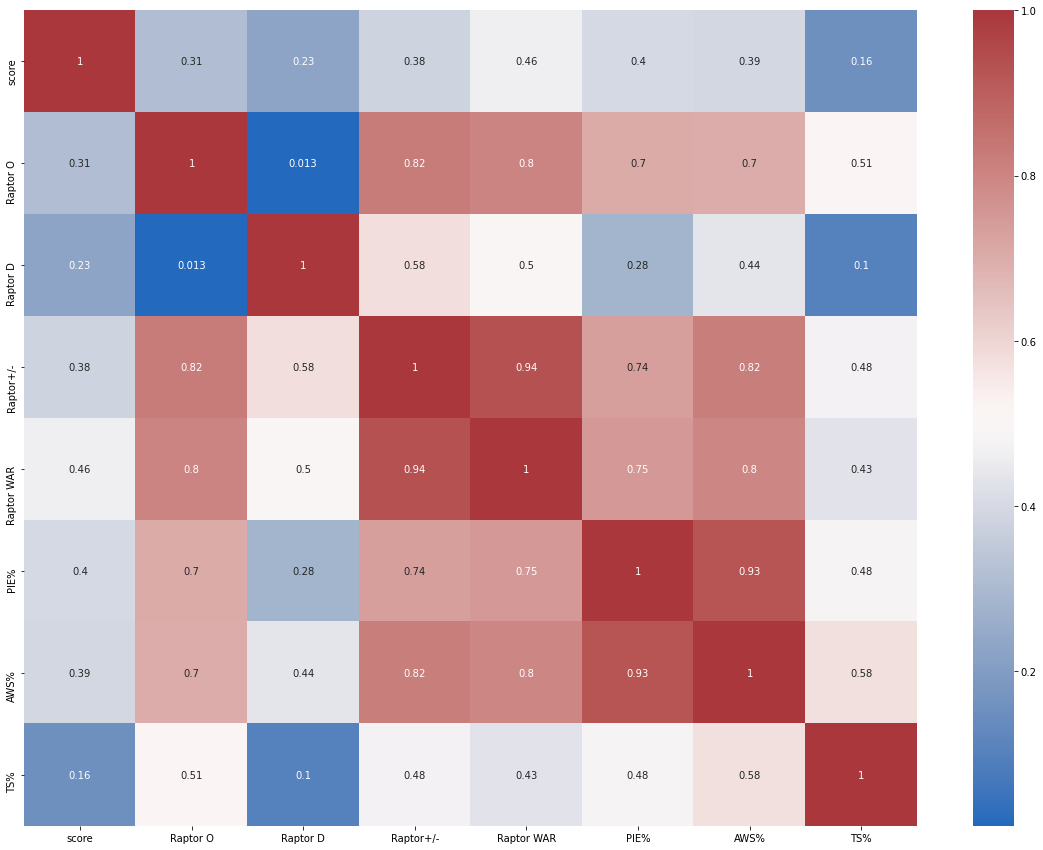

In [154]:
plt.rcParams["figure.figsize"] = (20, 15)
sns.heatmap(awards3.corr(), cmap = "vlag", annot = True)

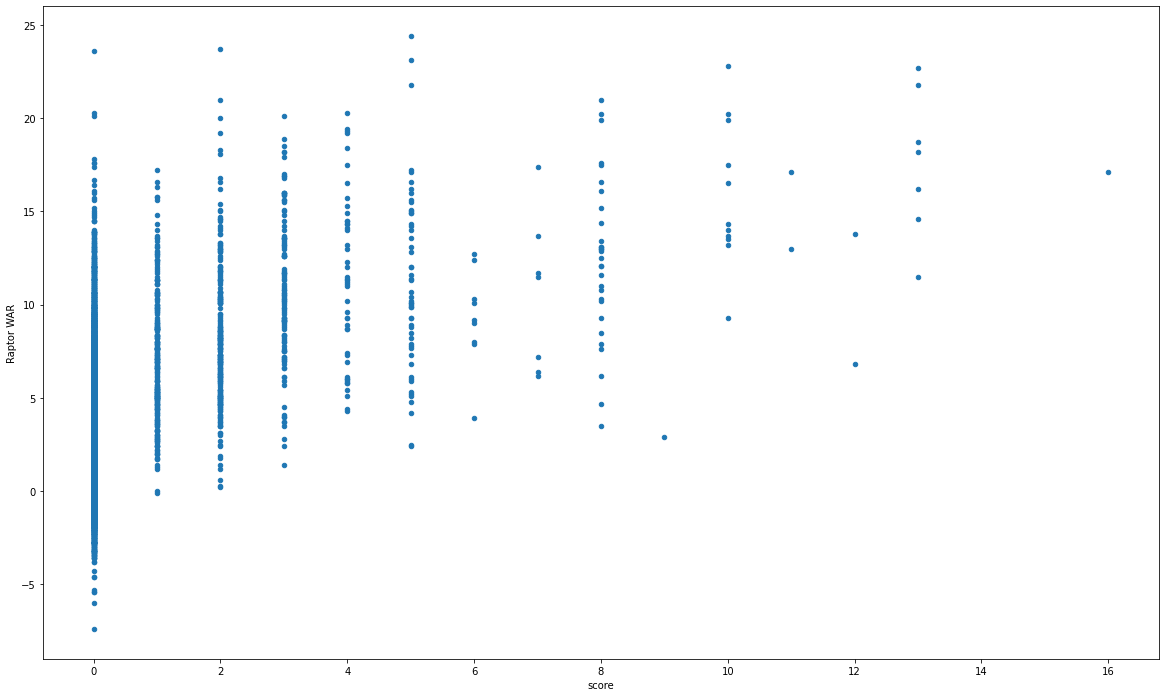

In [155]:
ax2 = awards3.plot("score", "Raptor WAR", kind="scatter", figsize=(20, 12))